In [46]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
import pickle
import json

In [47]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 1.age

In [51]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

<AxesSubplot:xlabel='age'>

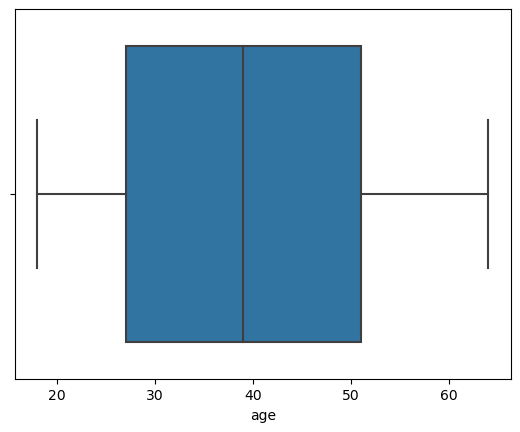

In [52]:
sns.boxplot(x=df["age"])

# 2.sex

In [53]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [54]:
df["sex"].value_counts().to_dict()

{'male': 676, 'female': 662}

In [55]:
df["sex"].replace({'male':1, 'female':0},inplace=True)

In [56]:
df["sex"].dtype

dtype('int64')

In [57]:
sex_value={'male':1, 'female':0}
sex_value

{'male': 1, 'female': 0}

# 3. bmi

In [58]:
df["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [59]:
df["bmi"].dtype

dtype('float64')

<AxesSubplot:xlabel='bmi'>

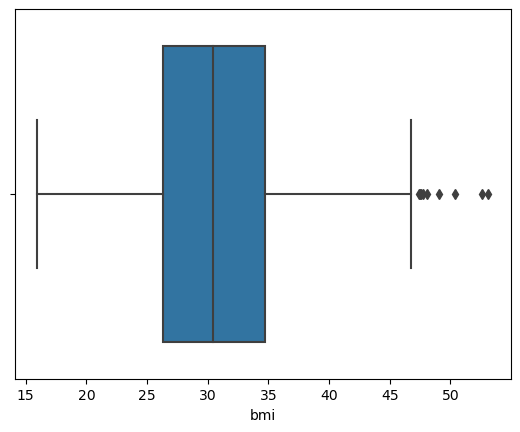

In [60]:
sns.boxplot(x=df["bmi"])

In [61]:
q1=df["bmi"].quantile(0.25)
q2=df["bmi"].quantile(0.50)
q3=df["bmi"].quantile(0.75)
median_bmi=df["bmi"].median()
iqr=q3-q1
upper_tail=q3+(1.5*iqr)
lower_tail=q1-(1.5*iqr)
print('upper_tail:',upper_tail)
print('lower_tail:',lower_tail)
print('median_bmi:',median_bmi)
print('q1:',q1)
print('q2:',q2)
print('q3:',q3)

upper_tail: 47.290000000000006
lower_tail: 13.7
median_bmi: 30.4
q1: 26.29625
q2: 30.4
q3: 34.69375


In [62]:
df[['bmi']].loc[df['bmi']>upper_tail]

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [63]:
median=df['bmi'].loc[(df['bmi']<=upper_tail)].median()
median

30.3

In [64]:
mean=df['bmi'].loc[(df['bmi']<=upper_tail)].mean()
mean

30.53734762979683

In [68]:
df.loc[df['bmi']>upper_tail,'bmi']=mean

In [69]:
df[['bmi']].loc[df['bmi']>upper_tail]

,bmi


# 4.children

In [70]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [71]:
df["children"].dtype

dtype('int64')

<AxesSubplot:xlabel='children'>

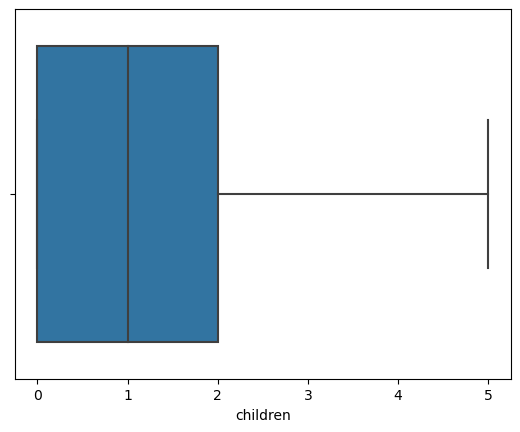

In [72]:
sns.boxplot(x=df["children"])

# 5.smoker

In [73]:
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [74]:
df["smoker"].replace({'no': 0, 'yes':1},inplace=True)

In [75]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [76]:
df["smoker"].dtype

dtype('int64')

In [77]:
smoker_value={'no': 0, 'yes':1}
smoker_value

{'no': 0, 'yes': 1}

# 6.region

In [78]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [79]:
df["region"].dtype

dtype('O')

In [80]:
df=pd.get_dummies(df,columns=["region"])

In [81]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


# ASSUMPTIONS VERIFICATION

# 1.LINEARITY

In [82]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.114282,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.039824,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.114282,0.039824,1.000000,0.017331,-0.002856,0.190752,-0.135903,-0.128458,0.253986,0.000650
children,0.042469,0.017163,0.017331,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,-0.002856,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.190752,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.135903,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.128458,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.253986,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,0.000650,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

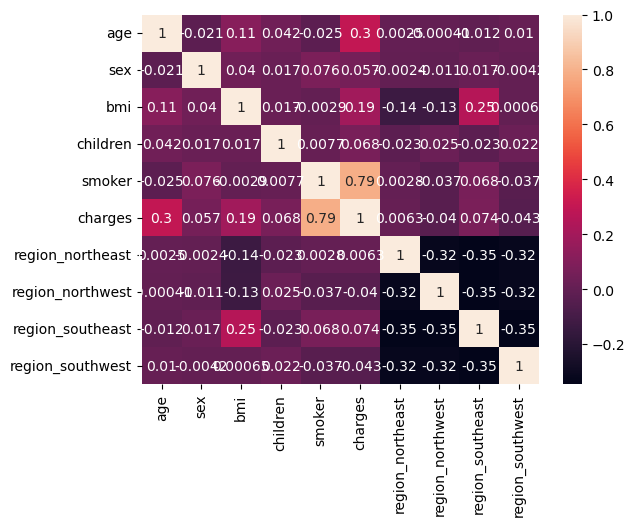

In [83]:
sns.heatmap(df.corr(),annot=True)

In [84]:
df1=df.drop("charges",axis=1)
df1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [85]:
df1["charges"]=df["charges"]
df1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0,10600.54830
1334,18,0,31.920,0,0,1,0,0,0,2205.98080
1335,18,0,36.850,0,0,0,0,1,0,1629.83350
1336,21,0,25.800,0,0,0,0,0,1,2007.94500


<AxesSubplot:>

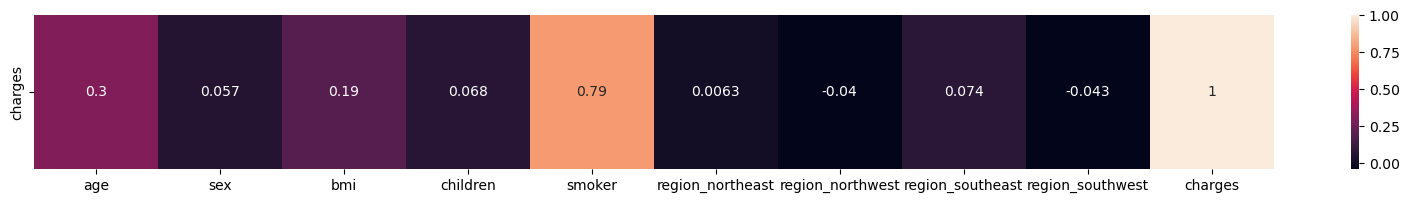

In [86]:
plt.figure(figsize=(20,2))
sns.heatmap(df1.corr().tail(1),annot=True)

# 2.NO MULTICOLINEARITY

In [87]:
df2=df1.drop("charges",axis=1)
df2

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [88]:
vif_list=[]
for i in range(df2.shape[1]):
    vif_list.append(variance_inflation_factor(df2.to_numpy(),i))
print(vif_list)

[1.0178166418892263, 1.0083433289042714, 1.0978219239223643, 1.0041363679786883, 1.012252841016393, 8.905997857927346, 8.961177139998332, 11.826991446860507, 9.554419576014517]


# Model building

In [89]:
df1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0,10600.54830
1334,18,0,31.920,0,0,1,0,0,0,2205.98080
1335,18,0,36.850,0,0,0,0,1,0,1629.83350
1336,21,0,25.800,0,0,0,0,0,1,2007.94500


In [90]:
x=df2
y=df1['charges']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [92]:
model=LinearRegression()
model

LinearRegression()

In [93]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [94]:
y_pred_train=model.predict(x_train)
y_pred_train

array([11244.50522185,  2581.3944089 ,  9426.29604024, ...,
        9595.82863656, 12824.79314719,  6406.14124858])

In [95]:
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)
print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

mse 39085335.25763121
rmse 6251.826553706622
mae 4303.598439840486
r2 0.7367812897282452


In [96]:
y_pred_test=model.predict(x_test)
y_pred_test

array([28333.88888348,  5411.36891132, 10834.00422534,  8661.89876923,
       12454.37413976, 10973.73535743,  7837.91747981, 15811.73206368,
       11764.95098162, 33145.85586942,  6760.55081343, 15618.20969178,
       11032.44630386,  2344.48497282,  6197.66138348, 35346.86485413,
        3763.51572216,   106.88142069,  8322.73316041, 13103.50190368,
       10660.79125952,  3051.8314233 ,  3085.6374607 ,  4204.85842314,
        4286.77265187, 15322.37599122,  5185.15792816,  8162.34967554,
       26888.87026154,  7866.58570074, 33403.41380845, 30775.37551558,
        2405.85192482,  -395.1023341 , 31776.86565916, 14621.38342371,
        5834.91160257, 26602.34210172, 11391.00902196,  8945.09855904,
        6590.24151987, 13245.18578147, 27324.38250242,   643.99050792,
        9104.66570585, 11241.04426061, 30836.53627765,  2973.53453676,
        9034.56482372, 26530.14369552, 13395.33401491, 29358.96049794,
       15249.29817812, 35519.46503621, 12138.37981637,  2758.69019438,
      

In [97]:
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)
print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

mse 27524796.687101696
rmse 5246.4079794752615
mae 3781.2911368862237
r2 0.8015127340165633


In [98]:
residuals=y_test-y_pred_test
residuals

1313    8063.687117
1254    -996.210111
372    -3194.586775
937      303.896981
484    -2891.345140
           ...     
427     4738.292369
1153   -3768.322050
973    -3879.683758
608     -761.061885
775    -2499.168584
Name: charges, Length: 268, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

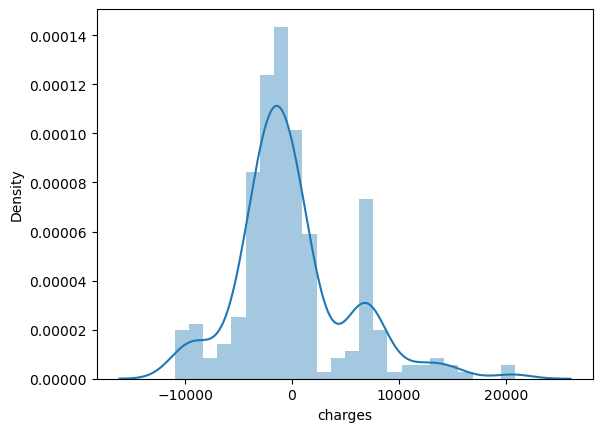

In [99]:
sns.distplot(residuals)

# Hypothesis Testing

In [100]:
from scipy.stats import shapiro

_ , p_val = shapiro(residuals) 

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 1.1398702814968686e-10
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


In [101]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [102]:
column_names = x.columns
len(column_names)

9

In [103]:
with open("Linear model.pkl", "wb") as f:
    pickle.dump(model, f)

In [104]:
#html requires data in json format 
json_data = {"sex":sex_value, 
            "smoker":smoker_value,
            "columns":list(column_names)}
json_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [106]:
with open("Project_data.json", "w") as f:
    json.dump(json_data, f)

# Single user Input Testing

In [113]:
age = 19.0
sex = "female"
bmi = 27.9
children = 0.0
smoker = "no"
region = "southwest"

region = "region_" + region
region

region_index = np.where(column_names == region)[0][0]
region_index

8

# 

In [108]:
region_index = region_index = list(column_names).index(region)
region_index

6

In [110]:
x.shape[1]

9

In [111]:
json_data['columns']

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [114]:
test_array = np.zeros(len(column_names))

test_array[0] = age
test_array[1] = json_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = json_data['smoker'][smoker]
test_array[region_index] = 1

test_array

array([19. ,  0. , 27.9,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ])

In [115]:
charges = round(model.predict([test_array])[0],2)
print("Predicted Medical Insurance Charges is :", charges, "/- Rs. Only")

Predicted Medical Insurance Charges is : 1358.73 /- Rs. Only


In [116]:
data = dict([('age', '84'), ('sex', 'male'), ('bmi', '24'), ('children', '2'), ('smoker', 'no'), ('region', 'northeast')])
data

{'age': '84',
 'sex': 'male',
 'bmi': '24',
 'children': '2',
 'smoker': 'no',
 'region': 'northeast'}

In [117]:
json_data['smoker'][smoker]

0